Dataset Loaded Successfully ✅
Shape: (102599, 26)
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
6  1004650                                   BlissArtsSpace!  61300605564   
7  1005202                                   BlissArtsSpace!  90821839709   
8  1005754                   Large Furnished Room Near B'way  79384379533   
9  1006307                Cozy Clean Guest Room - Family Apt  75527839483   

  host_identity_verified host name neighbourhood group       neighbourhood  \
0            unconfirmed

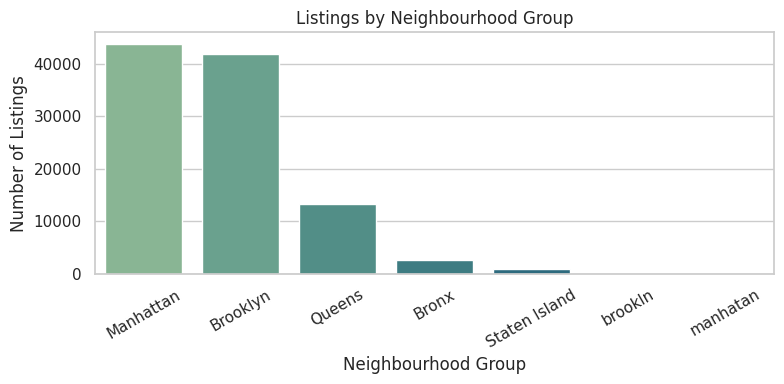

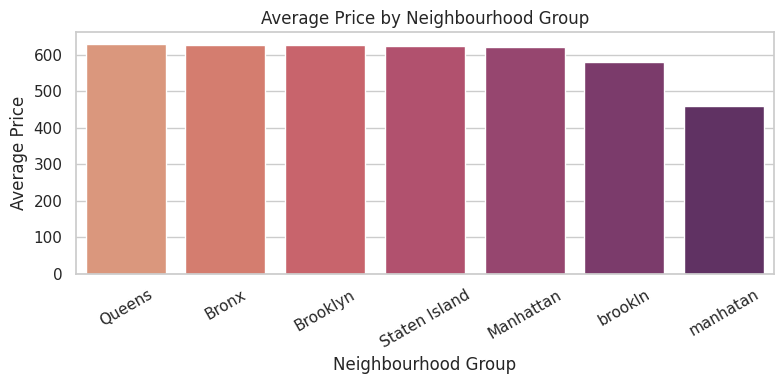

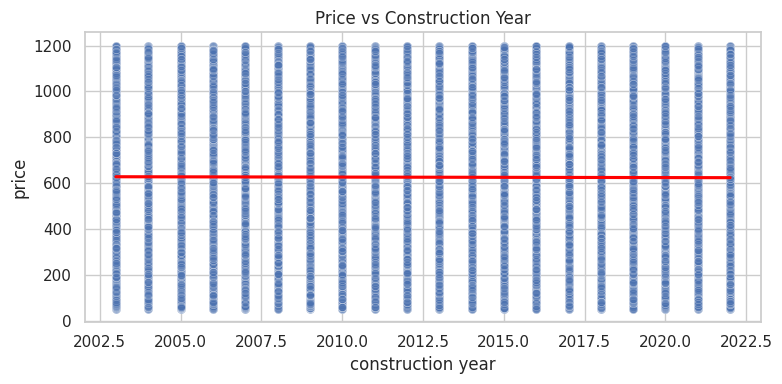


Top 10 Hosts by Listings Count:
 host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


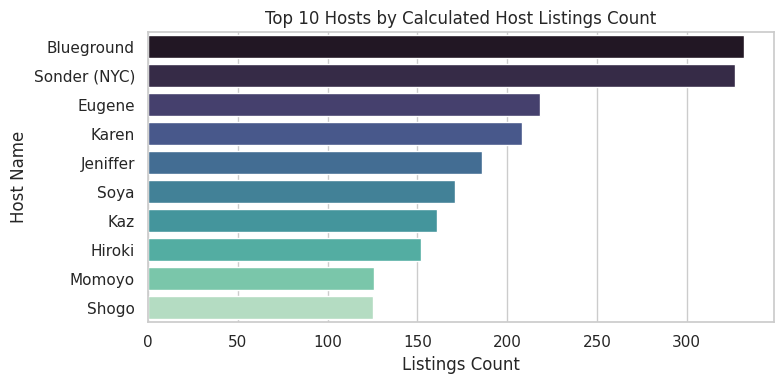


Positive Review Rate by Host Identity Verification:
 host_identity_verified
verified       0.457640
unconfirmed    0.452754
Name: positive_review, dtype: float64


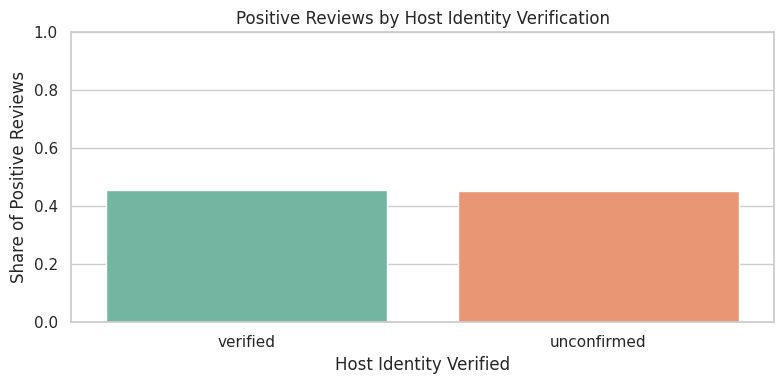


Correlation between Price and Service Fee: 1.000


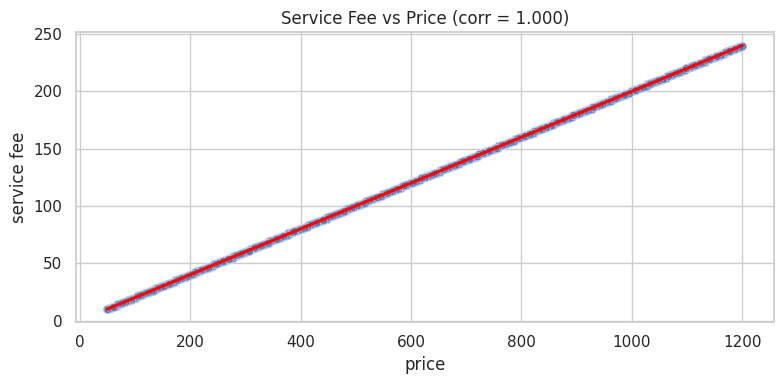


Average Review Rate Pivot Table:
 room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333


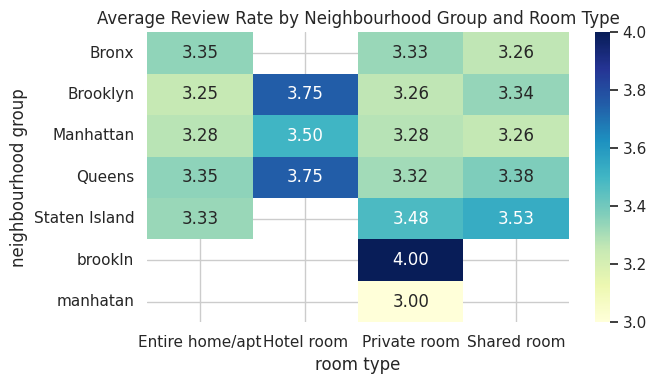

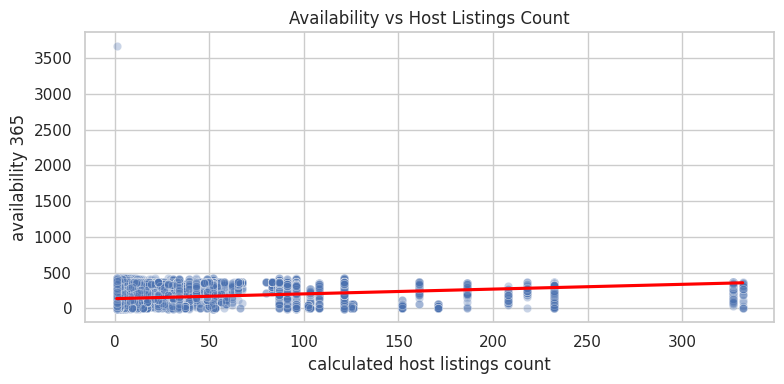


✅ Analysis Complete — Visualizations and Statistics Generated Successfully.


In [ ]:
# -------------------------------------------------------
# VOIS Project Data Analysis - Airbnb-style Dataset
# -------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

# -------------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------------
FILEPATH = r"/content/1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(FILEPATH)

# Inspect first few rows
print("Dataset Loaded Successfully ✅")
print("Shape:", df.shape)
print(df.head(10))

# -------------------------------------------------------
# 2. Data Cleaning
# -------------------------------------------------------
df.columns = [c.strip().lower() for c in df.columns]

# Ensure numeric conversion for price and key numeric columns
numeric_cols = ['price', 'construction year', 'service fee',
                'review rate number', 'calculated host listings count', 'availability 365']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------------------------------
# 3. Distribution by Neighbourhood Group
# -------------------------------------------------------
if 'neighbourhood group' in df.columns:
    counts = df.groupby('neighbourhood group').size().sort_values(ascending=False)
    avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

    print("\nListings Count by Neighbourhood Group:")
    print(counts.head())
    print("\nAverage Price by Neighbourhood Group:")
    print(avg_price.head())

    # Plot 1: Listings by Neighbourhood Group
    plt.figure()
    sns.barplot(x=counts.index, y=counts.values, palette='crest')
    plt.title('Listings by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    # Plot 2: Average Price by Neighbourhood Group
    plt.figure()
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare')
    plt.title('Average Price by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Average Price')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 4. Relationship: Construction Year vs Price
# -------------------------------------------------------
if 'construction year' in df.columns and 'price' in df.columns:
    plt.figure()
    sns.scatterplot(data=df, x='construction year', y='price', alpha=0.3)
    sns.regplot(data=df, x='construction year', y='price', scatter=False, color='red')
    plt.title('Price vs Construction Year')
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 5. Top 10 Hosts by Listings Count
# -------------------------------------------------------
if 'host name' in df.columns:
    top_hosts = (
        df.groupby('host name')['calculated host listings count']
        .max()
        .sort_values(ascending=False)
        .head(10)
    )
    print("\nTop 10 Hosts by Listings Count:\n", top_hosts)

    plt.figure()
    sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='mako')
    plt.title('Top 10 Hosts by Calculated Host Listings Count')
    plt.xlabel('Listings Count')
    plt.ylabel('Host Name')
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 6. Identity Verification vs Positive Reviews
# -------------------------------------------------------
if 'host_identity_verified' in df.columns and 'review rate number' in df.columns:
    df['positive_review'] = np.where(df['review rate number'] >= 4, 1, 0)
    id_rate = df.groupby('host_identity_verified')['positive_review'].mean().sort_values(ascending=False)
    print("\nPositive Review Rate by Host Identity Verification:\n", id_rate)

    plt.figure()
    sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='Set2')
    plt.title('Positive Reviews by Host Identity Verification')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Share of Positive Reviews')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 7. Correlation: Price vs Service Fee
# -------------------------------------------------------
if 'price' in df.columns and 'service fee' in df.columns:
    corr_val = df[['price', 'service fee']].corr().iloc[0, 1]
    print(f"\nCorrelation between Price and Service Fee: {corr_val:.3f}")

    plt.figure()
    sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
    sns.regplot(data=df, x='price', y='service fee', scatter=False, color='red')
    plt.title(f'Service Fee vs Price (corr = {corr_val:.3f})')
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 8. Avg Review Rate by Neighbourhood Group & Room Type
# -------------------------------------------------------
if {'neighbourhood group', 'room type', 'review rate number'}.issubset(df.columns):
    pivot_rt = df.pivot_table(index='neighbourhood group',
                              columns='room type',
                              values='review rate number',
                              aggfunc='mean')
    print("\nAverage Review Rate Pivot Table:\n", pivot_rt.head())

    plt.figure(figsize=(7, 4))
    sns.heatmap(pivot_rt, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title('Average Review Rate by Neighbourhood Group and Room Type')
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 9. Host Listing Count vs Availability
# -------------------------------------------------------
if 'calculated host listings count' in df.columns and 'availability 365' in df.columns:
    plt.figure()
    sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.3)
    sns.regplot(data=df, x='calculated host listings count', y='availability 365', scatter=False, color='red')
    plt.title('Availability vs Host Listings Count')
    plt.tight_layout()
    plt.show()

print("\n✅ Analysis Complete — Visualizations and Statistics Generated Successfully.")
